# 异常检测

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/anormaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


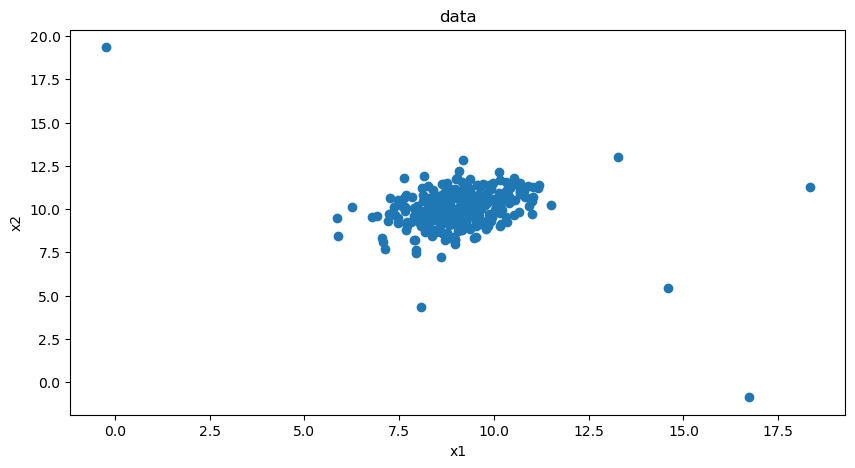

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

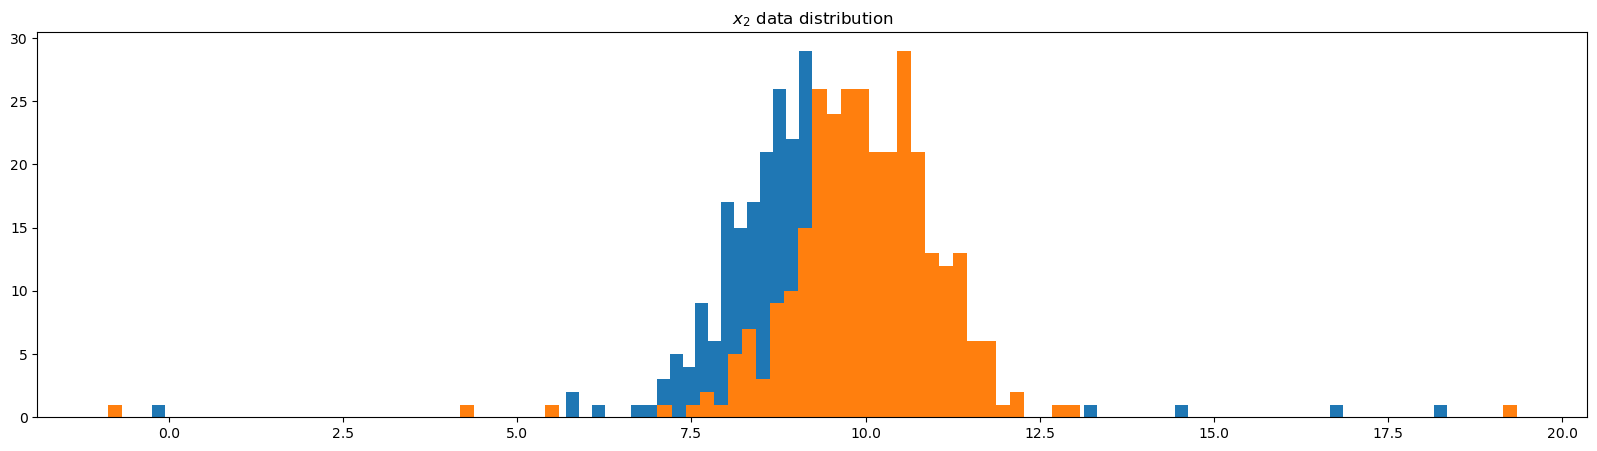

In [14]:
fig2 = plt.figure(figsize=(20,5))

# x_1数据分布情况
plt.hist(x1,bins=100)
plt.title('$x_1$ data distribution')

# x_2数据分布情况
plt.hist(x2, bins=100)
plt.title('$x_2$ data distribution')
plt.show()

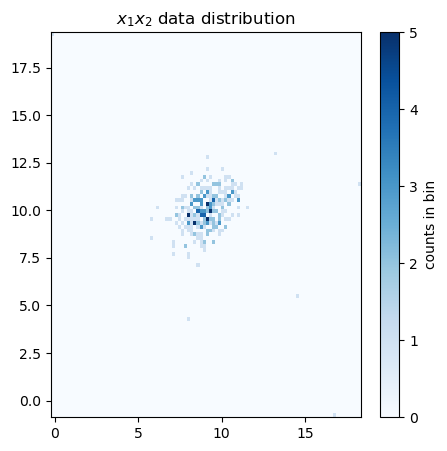

In [27]:
fig3 = plt.figure(figsize=(5,5))
plt.hist2d(x1, x2, bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.title('$x_1 x_2$ data distribution')
plt.show()

In [28]:
# 计算均值和标准差（直接用公式即可）
x1_mean = x1.mean()
x1_std = x1.std()
x2_mean = x2.mean()
x2_std = x2.std()
print(x1_mean, x1_std, x2_mean, x2_std)

9.112225783931596 1.3559573758220915 9.997710507954398 1.3097071175386399


In [18]:
from scipy.stats import norm
x1_range = np.linspace(0, 20, 300)
x2_range = np.linspace(0, 20, 300)
x1_nornal = norm.pdf(x1_range, x1_mean, x1_std)
x2_normal = norm.pdf(x2_range, x2_mean, x2_std)

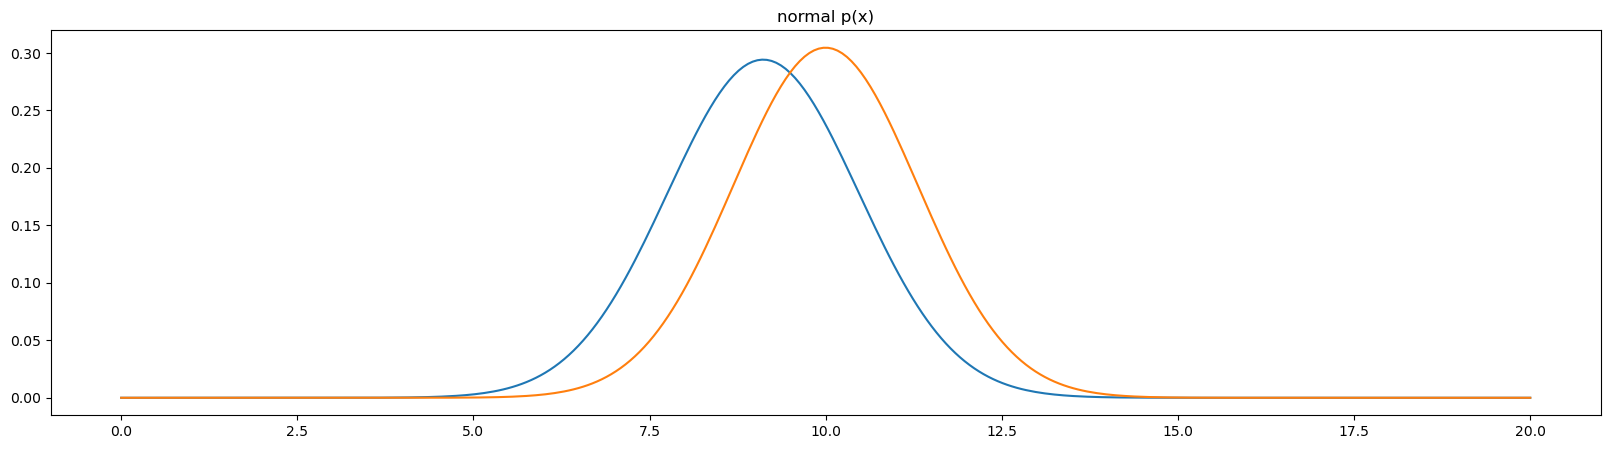

In [30]:
fig4 = plt.figure(figsize=(20,5))

plt.plot(x1_range, x1_nornal)
plt.plot(x2_range, x2_normal)

plt.title('normal p(x)')

plt.show()


In [31]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.03)
ad_model.fit(data)

EllipticEnvelope(contamination=0.03)

In [32]:
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    297
-1     10
dtype: int64


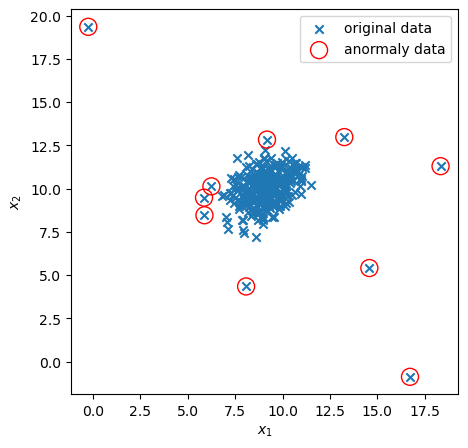

In [34]:
#visualize the result
fig4 = plt.figure(figsize=(5,5))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anormaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend((orginal_data,anormaly_data),('original data','anormaly data'))
# plt.axis([4.5,15,2.5,15])
plt.show()